In [10]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from arch.unitroot import PhillipsPerron
from arch.unitroot import ZivotAndrews
from arch.unitroot import DFGLS
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


**Load Data**

In [6]:
df = pd.read_csv("/Users/juanvalidmind/Dev/github/validmind/validmind-python/notebooks/datasets/lending_club_loan_rates.csv", sep='\t')
df = df.rename(columns={'Unnamed: 0': 'Date'})
df = df.set_index(pd.to_datetime(df['Date']))
df.drop(["Date"], axis=1, inplace=True)
df

,loan_rate_A,loan_rate_B,loan_rate_C,loan_rate_D,FEDFUNDS,diff1_loan_rate_A,diff1_loan_rate_B,diff1_loan_rate_C,diff1_loan_rate_D,diff1_FEDFUNDS,diff2_FEDFUNDS
Date,,,,,,,,,,,
2007-08-01,7.766667,9.497692,10.947500,12.267000,5.02,0.060000,0.134359,0.207500,-0.467444,-0.24,-0.25
2007-09-01,7.841429,9.276667,10.829167,12.436667,4.94,0.074762,-0.221026,-0.118333,0.169667,-0.08,0.16
2007-10-01,7.830000,9.433333,10.825926,12.737368,4.76,-0.011429,0.156667,-0.003241,0.300702,-0.18,-0.10
2007-11-01,7.779091,9.467778,10.967037,12.609444,4.49,-0.050909,0.034444,0.141111,-0.127924,-0.27,-0.09
2007-12-01,7.695833,9.387500,10.805000,12.478889,4.24,-0.083258,-0.080278,-0.162037,-0.130556,-0.25,0.02
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,7.218997,11.161286,15.142618,19.857603,1.91,0.052118,0.045181,0.056796,0.088167,0.00,-0.09
2018-09-01,7.201281,11.191918,15.139769,19.748459,1.95,-0.017716,0.030632,-0.002849,-0.109144,0.04,0.04
2018-10-01,7.228498,11.208418,15.129105,19.792163,2.19,0.027218,0.016500,-0.010665,0.043704,0.24,0.20


**ADF Metric**

In [12]:
adftest = adfuller(df['loan_rate_A'])
adftest

(-1.917289312690944,
 0.32397189281015515,
 1,
 135,
 {'1%': -3.479742586699182,
  '5%': -2.88319822181578,
  '10%': -2.578319684499314},
 -71.08908853191068)

**KPSS Metric**

In [14]:
kpsstest = kpss(df['loan_rate_A'])
kpsstest

/Users/juanvalidmind/Library/Caches/pypoetry/virtualenvs/validmind-eEL8LtKG-py3.10/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.012356679488042,
 0.01,
 6,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

**Phillips-Perron (PP) Test**

In [16]:
pp = PhillipsPerron(df['loan_rate_A'])
pp

Test Statistic,-2.027
P-value,0.275
Lags,13


In [23]:
pp.nobs

136

**Zivot-Andrews Test**

In [21]:
za = ZivotAndrews(df['loan_rate_A'])
za

Test Statistic,-3.499
P-value,0.680
Lags,1


In [22]:
za.nobs

137

**Dickey-Fuller GLS Test**

In [26]:
dfgls = DFGLS(df['loan_rate_A'])
dfgls


Test Statistic,-1.798
P-value,0.071
Lags,1


In [27]:
dfgls.nobs

135

**Seasonal Decomposition** 

In [7]:
sd = seasonal_decompose(df['loan_rate_A'])
sd

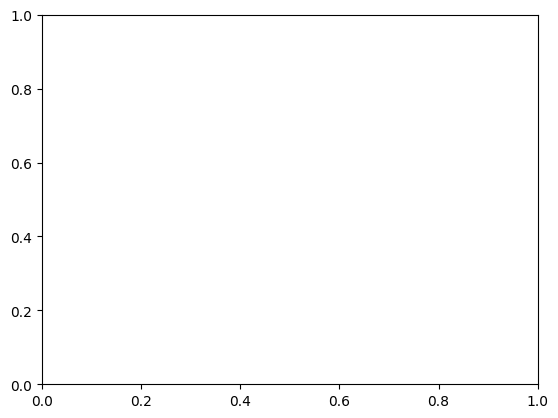

In [13]:
fig, ax = plt.subplots()